# IMPORTS

In [2]:
import pandas as pd
from IPython.display import Markdown, display
import time
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.1f' % x) #print float as int

def md(input):
    display(Markdown(input))

def check(input):
    return md(f"☑️ **{input}**")

# LOAD DATASET

In [3]:
DATA_PATH = "data/raw/AmesHousing.txt"

# readinag given csv file
# and creating dataframe

def load_csv(file_path, sep):
    """
    Load CSV file and print out the execution time

    Parameter : CSV file path

    Return : Returns a Dataframe
    """
    start_time = time.time()
    df = pd.read_csv(file_path, error_bad_lines=False, low_memory=False, nrows = None, sep=sep)
    check('Import the dataset successful')
    print("⏰ Execution time : %s seconds" % round((time.time() - start_time), 2))
    return df

df = load_csv(DATA_PATH, "\t")

<ipython-input-3-d7017105814a>:20: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_csv(DATA_PATH, "\t")


☑️ **Import the dataset successful**

⏰ Execution time : 0.05 seconds


# BASIC EDA

In [4]:
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [5]:
def dfInfo(df):
    return md("This dataframe contains {} lines and {} columns".format(df.shape[0], df.shape[1]))

dfInfo(df)

This dataframe contains 2930 lines and 82 columns

In [6]:
df.describe()

Order          PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
count 2930.0       2930.0       2930.0        2440.0    2930.0        2930.0   
mean  1465.5  714464497.0         57.4          69.2   10147.9           6.1   
std    846.0  188730844.6         42.6          23.4    7880.0           1.4   
min      1.0  526301100.0         20.0          21.0    1300.0           1.0   
25%    733.2  528477022.5         20.0          58.0    7440.2           5.0   
50%   1465.5  535453620.0         50.0          68.0    9436.5           6.0   
75%   2197.8  907181097.5         70.0          80.0   11555.2           7.0   
max   2930.0 1007100110.0        190.0         313.0  215245.0          10.0   

       Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
count        2930.0      2930.0          2930.0        2907.0  ...   
mean            5.6      1971.4          1984.3         101.9  ...   
std             1.1        30.2            20.9         179.1  ...   
min             1.0      1872.0          1950.0           0.0  ...   
25%             5.0      1954.0          1965.0           0.0  ...   
50%             5.0      1973.0          1993.0           0.0  ...   
75%             6.0      2001.0          2004.0         164.0  ...   
max             9.0      2010.0          2010.0        1600.0  ...   

       Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
count        2930.0         2930.0          2930.0      2930.0        2930.0   
mean           93.8           47.5            23.0         2.6          16.0   
std           126.4           67.5            64.1        25.1          56.1   
min             0.0            0.0             0.0         0.0           0.0   
25%             0.0            0.0             0.0         0.0           0.0   
50%             0.0           27.0             0.0         0.0           0.0   
75%           168.0           70.0             0.0         0.0           0.0   
max          1424.0          742.0          1012.0       508.0         576.0   

       Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  
count     2930.0    2930.0   2930.0   2930.0     2930.0  
mean         2.2      50.6      6.2   2007.8   180796.1  
std         35.6     566.3      2.7      1.3    79886.7  
min          0.0       0.0      1.0   2006.0    12789.0  
25%          0.0       0.0      4.0   2007.0   129500.0  
50%          0.0       0.0      6.0   2008.0   160000.0  
75%          0.0       0.0      8.0   2009.0   213500.0  
max        800.0   17000.0     12.0   2010.0   755000.0  

[8 rows x 39 columns]

In [7]:
check('Using .info() to get infos on the df')
df.info()

☑️ **Using .info() to get infos on the df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

☑️ **Display the data type repartition**

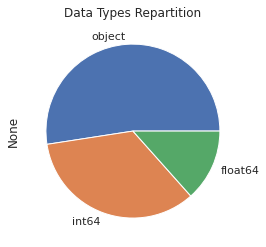

object     43
int64      28
float64    11
dtype: int64

In [23]:
check('Display the data type repartition')
sns.set_theme(style="whitegrid")
df.dtypes.value_counts().plot.pie()
plt.title("Data Types Repartition")
plt.show()
df.dtypes.value_counts()



In [9]:
# Checking missing values
check('Checking for missing values')
print("Null values summary:\n{}\n".format(df.isna().sum()))
print("No null values found, data clean!" if (not df.isna().sum().all()) else "Data needs cleaning..." )

☑️ **Checking for missing values**

Null values summary:
Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating            

In [10]:
# Checking the target variable
print(df['SalePrice'].describe())

count     2930.0
mean    180796.1
std      79886.7
min      12789.0
25%     129500.0
50%     160000.0
75%     213500.0
max     755000.0
Name: SalePrice, dtype: float64


The cheapest house sold for $12,789 and the most expensive for $755,000
The average sales price is $180,796, while median is $160,000


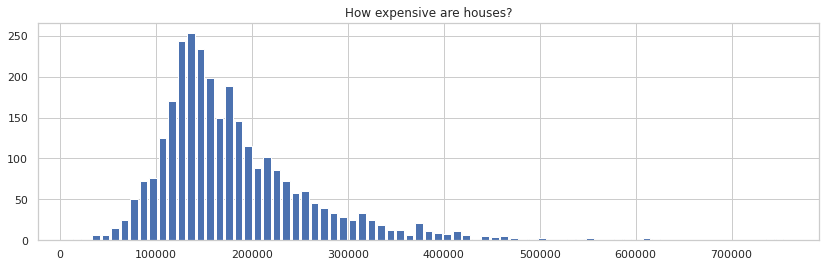

In [11]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    df.SalePrice.min(), df.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    df.SalePrice.mean(), df.SalePrice.median()))
df.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

Oldest house built in 1872. Newest house built in 2010.


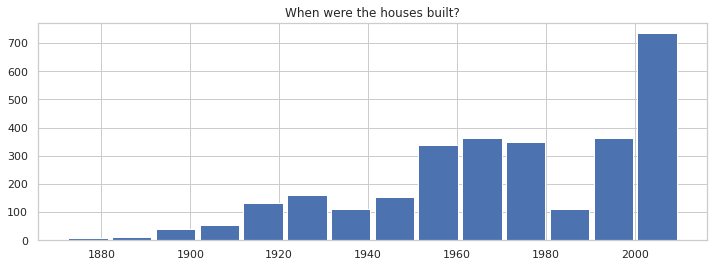

In [12]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    df['Year Built'].min(), df['Year Built'].max()))
df['Year Built'].hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

The average house has 1,500 sq ft of space, the median 1,442 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


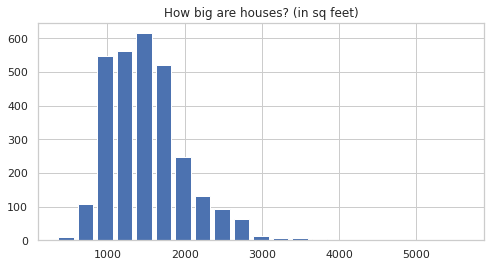

In [13]:
# How big are houses
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    df['Gr Liv Area'].mean(), df['Gr Liv Area'].median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    df['Gr Liv Area'].max(), df['Gr Liv Area'].min()))
df['Gr Liv Area'].hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)')
plt.show()

In [14]:
def get_feature_groups(df):
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = df.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['PID','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups(df)

/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


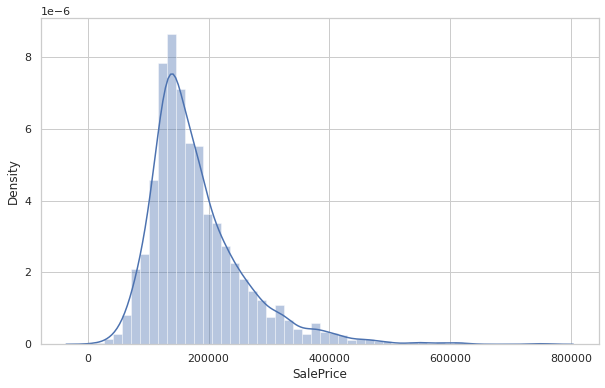

In [15]:
# Let's start with our dependent variable, SalePrice
plt.figure(figsize=(10,6))
sns.distplot(df.SalePrice)
plt.show()

/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

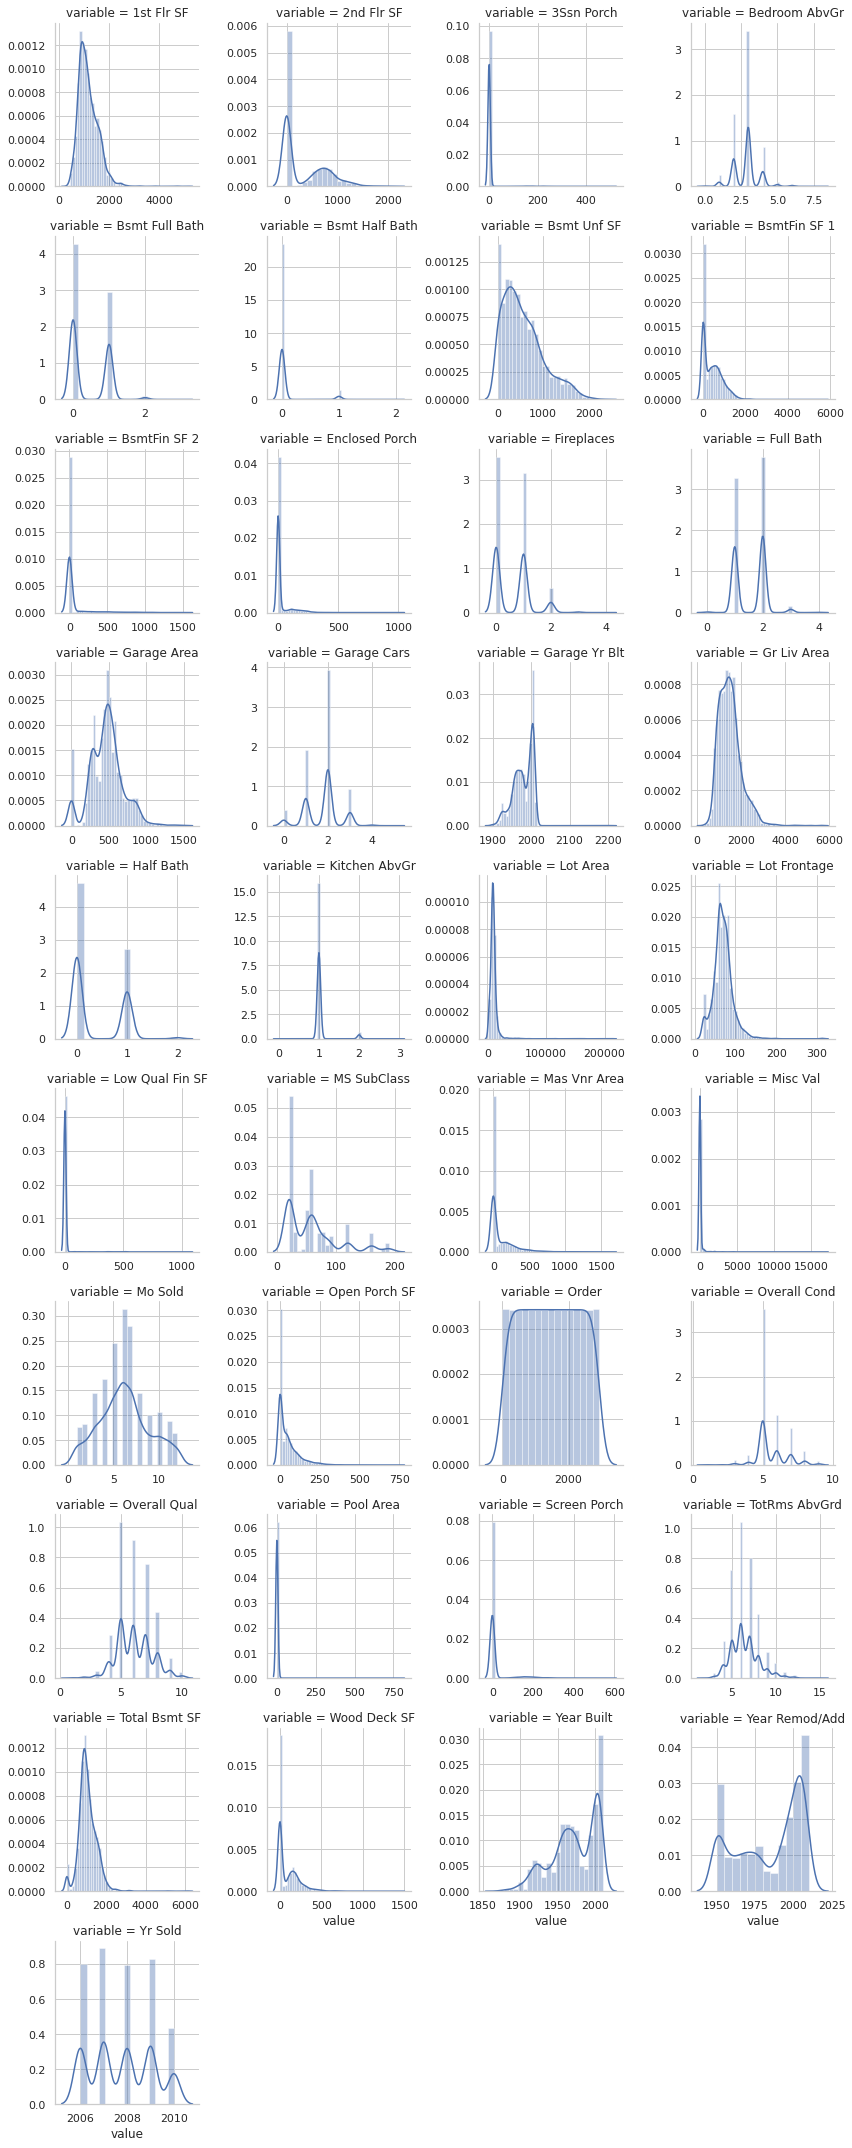

In [16]:
# Grid of distribution plots of all numerical features
f = pd.melt(df, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


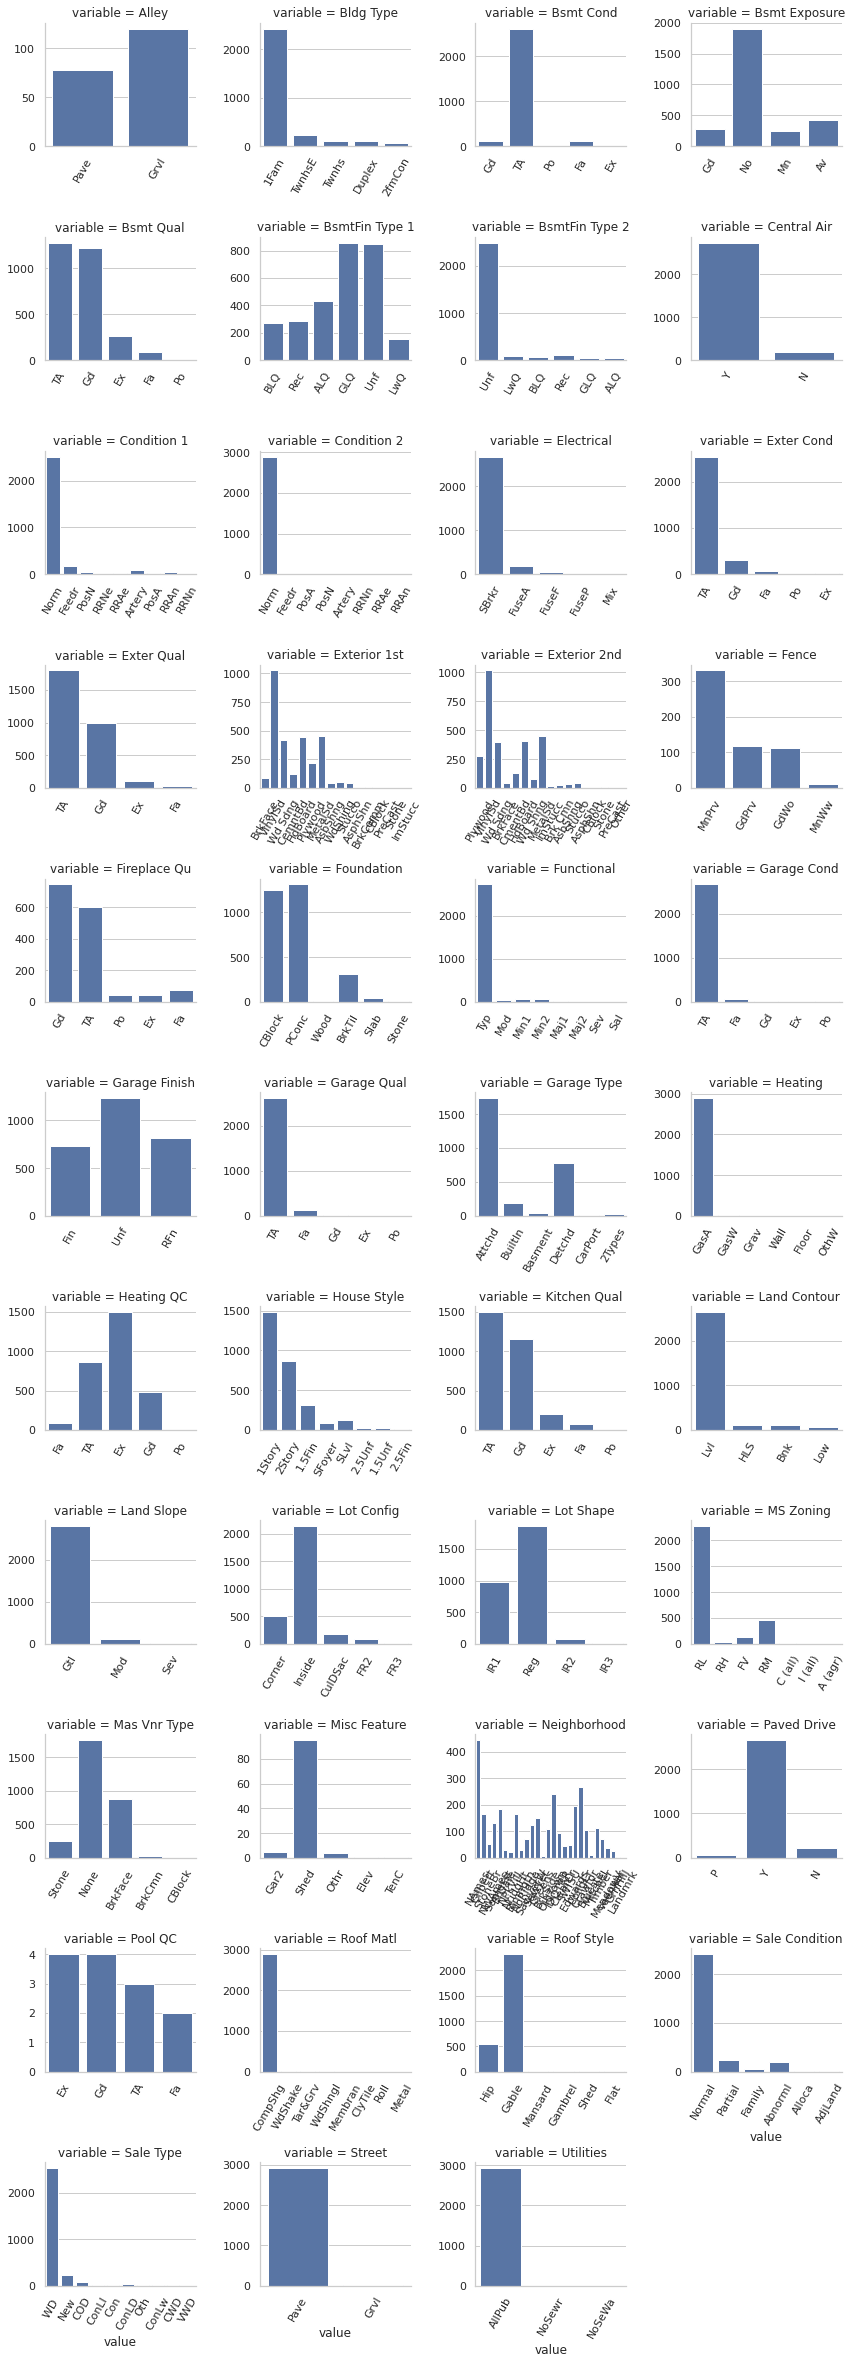

In [17]:
# Count plots of categorical features
f = pd.melt(df, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

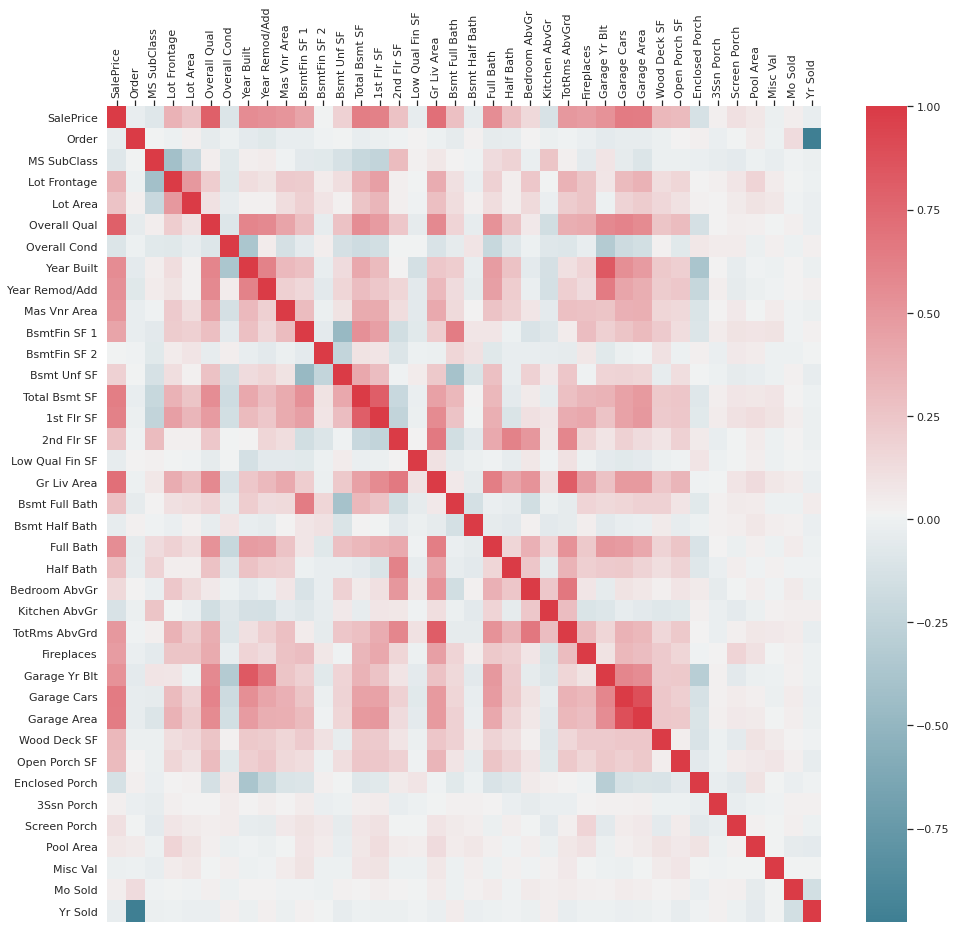

In [18]:
# Let's take a look at the correlation between numerical features
corr = df[['SalePrice'] + num_features].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


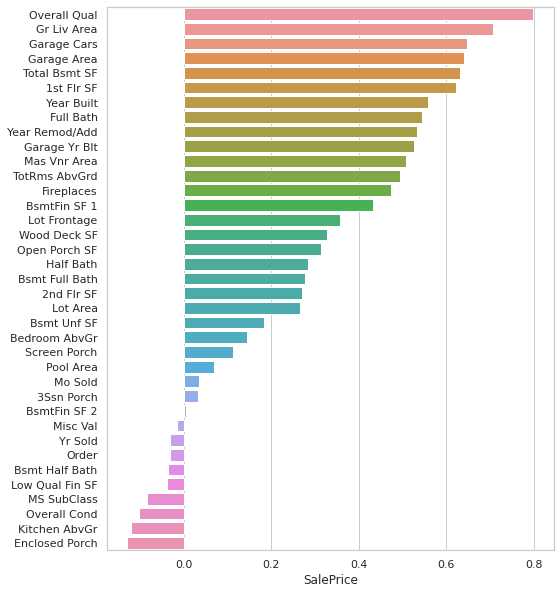

In [19]:
# Feature sorted by correlation to SalePrice, from positive to negative
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

# DATA PREPROCESSING

In [20]:
# ... and let's just get peace of mind for our data
print('Train set duplicate IDs: {}'.format(df.duplicated('PID').sum()))

Train set duplicate IDs: 0
